In [1]:
from kan import *
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = KAN(width=[3,2,3,1], grid=8, k=3, seed=0, device=device)

cuda


In [2]:
import pandas as pd

df = pd.read_parquet('../data/main_cluster.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644 entries, 1001 to 947
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   suite_area    2644 non-null   int64  
 1   street        2644 non-null   object 
 2   neighborhood  2644 non-null   object 
 3   condominium   2644 non-null   int64  
 4   tax           2644 non-null   int64  
 5   asking_price  2644 non-null   float64
 6   full_address  2644 non-null   object 
 7   latitude      2644 non-null   float64
 8   longitude     2644 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 206.6+ KB


In [3]:
df = df.filter(
    items=[
        'suite_area',
        'latitude',
        'longitude',
        'asking_price'
    ]
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2644 entries, 1001 to 947
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   suite_area    2644 non-null   int64  
 1   latitude      2644 non-null   float64
 2   longitude     2644 non-null   float64
 3   asking_price  2644 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 103.3 KB


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('asking_price', axis=1), df.asking_price)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1983, 3), (661, 3), (1983,), (661,))

In [6]:
X_train_tensor = torch.tensor(X_train.values, device=device)
y_train_tensor = torch.tensor(y_train.values, device=device)

X_test_tensor = torch.tensor(X_test.values, device=device)
y_test_tensor = torch.tensor(y_test.values, device=device)

dataset = {
    'train_input' : X_train_tensor,
    'train_label' : y_train_tensor,
    'test_input'  : X_test_tensor,
    'test_label'  : y_test_tensor,
}

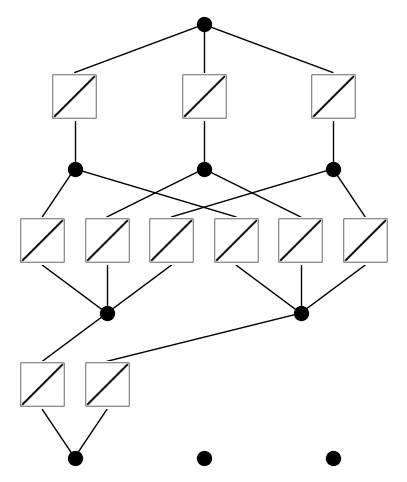

In [7]:
model(dataset['train_input'])
model.plot(beta=1000)

In [28]:
[i for i in model.parameters()]

[Parameter containing:
 tensor([[-0., 0.]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[0., 0., -0.]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[-0.]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[-1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
           1.0000],
         [-1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
           1.0000],
         [-1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
           1.0000],
         [-1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
           1.0000],
         [-1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
           1.0000],
         [-1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
           1.0000]], device='cuda:0'),
 Parameter containing:
 tensor([[-0.0019, -0.0076, -0.0035, -0.0032,  0.0007,  0.0018,  0.0070, -0.0

In [29]:
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.);

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
model.plot()

In [ ]:
model.prune()
model.plot(mask=True)

In [ ]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [ ]:
model.train(dataset, opt="LBFGS", steps=50);

In [ ]:
model.plot()